In [2]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import glob
import os

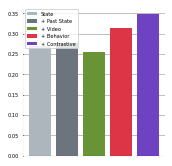

In [23]:
from neuroformer.visualize import set_research_params
set_research_params()

# experiment_pth = "./models/tensorboard/visnav_lateral/behavior_pred_exp/classification/ablations_1"
experiment_pth = "./models/tensorboard/visnav_medial/behavior_pred_exp/classification/1"
model_dirs = list(pathlib.Path(experiment_pth).glob('*'))


plt.figure(figsize=(2.5, 2.5))
file_paths = []
for model_dir in model_dirs:
    file_paths += list(model_dir.glob('**/scores__top_p0_.json'))
# open json files
json_files = []
for file_path in file_paths:
    with open(file_path, 'r') as f:
        json_files.append(json.load(f))

# model_names = list(["State", "+ Past State", "+ Video", "+ Behavior", "+ Constrastive"])
model_names = ["State", "+ Past State", "+ Video", "+ Behavior", "+ Contrastive"]
model_colors = ["#adb5bd", "#6c757d", "#679436", "#dc3545", "#6f42c1"]
f1_results = [json_file['F1'] for json_file in json_files]

# save to json inside experiment folder
with open(os.path.join(experiment_pth, 'f1_results.json'), 'w') as f:
    json.dump(f1_results, f)

f1_results = [json_file['F1'] for json_file in json_files]
# save results to csv
df = pd.DataFrame({'model': model_names, 'f1': f1_results})
df.to_csv(os.path.join(experiment_pth, 'f1_results.csv'), index=False)
bars = plt.bar(model_names, f1_results, color=model_colors)
# add legend inside the bar plot
plt.legend(bars, model_names, loc='upper left')
plt.tight_layout()

# turn of x ticks
plt.xticks([])
plt.grid()
# keep grid behind the bars
plt.gca().set_axisbelow(True)

# turn off top and left axis
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# save_path
plt.savefig(os.path.join(experiment_pth, 'f1_results.pdf'), dpi=300, bbox_inches='tight')

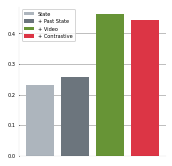

In [24]:
from neuroformer.visualize import set_research_params
set_research_params()

experiment_pth = "./models/tensorboard/visnav_lateral/behavior_pred_exp/classification/ablations_1"
# experiment_pth = "./models/tensorboard/visnav_medial/behavior_pred_exp/classification/1"
experiment_pth = "./models/tensorboard/Combo3_V1AL/interval_correction/downstream_exp/ablations_2"
model_dirs = list(pathlib.Path(experiment_pth).glob('*'))


plt.figure(figsize=(2.5, 2.5))
file_paths = []
for model_dir in model_dirs:
    file_paths += list(model_dir.glob('**/scores_11_top:0.9_1.0_0.9_1.0.json'))
# open json files
json_files = []
for file_path in file_paths:
    with open(file_path, 'r') as f:
        json_files.append(json.load(f))

# model_names = list(["State", "+ Past State", "+ Video", "+ Behavior", "+ Constrastive"])
model_names = ["State", "+ Past State", "+ Video", "+ Contrastive"]
model_colors = ["#adb5bd", "#6c757d", "#679436", "#dc3545", "#6f42c1"]
f1_results = [json_file['pred']['F1'] for json_file in json_files]


# save to json inside experiment folder
with open(os.path.join(experiment_pth, 'f1_results.json'), 'w') as f:
    json.dump(f1_results, f)

# save results to csv
f1_results = [json_file['pred']['F1'] for json_file in json_files]
df = pd.DataFrame({'model': model_names, 'f1': f1_results})
df.to_csv(os.path.join(experiment_pth, 'f1_results.csv'), index=False)
bars = plt.bar(model_names, f1_results, color=model_colors)
# add legend inside the bar plot
plt.legend(bars, model_names, loc='upper left')
plt.tight_layout()

# turn of x ticks
plt.xticks([])
plt.grid()
# keep grid behind the bars
plt.gca().set_axisbelow(True)

# turn off top and left axis
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# save_path
plt.savefig(os.path.join(experiment_pth, 'f1_results.pdf'), dpi=300, bbox_inches='tight')

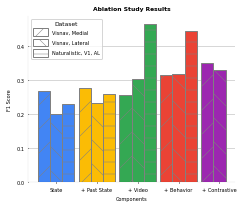

In [116]:
import matplotlib.lines as mlines

exp_pth_lat = "./models/tensorboard/visnav_lateral/behavior_pred_exp/classification/ablations_1"
exp_path_med = "./models/tensorboard/visnav_medial/behavior_pred_exp/classification/1"
exp_path_v1al = "./models/tensorboard/Combo3_V1AL/interval_correction/downstream_exp/ablations_2"

# Load your datasets
df1 = pd.read_csv(os.path.join(exp_pth_lat, 'f1_results.csv'))
df2 = pd.read_csv(os.path.join(exp_path_med, 'f1_results.csv'))
df3 = pd.read_csv(os.path.join(exp_path_v1al, 'f1_results.csv'))

# set colors
model_colors = ["#4285F4", "#FBBC05", "#34A853", "#EA4335", "#9C27B0"]

# # Make sure your dataframes are sorted by model_name to align bars correctly
# df1 = df1.sort_values('model', ascending=False)
# df2 = df2.sort_values('model', ascending=False)
# df3 = df3.sort_values('model', ascending=False)

# Define the bar width
bar_width = 0.3

# Set the positions of the bars on the x-axis
r1 = np.arange(len(df1))
r2 = np.arange(len(df2)) + bar_width
r3 = np.arange(len(df3)) + (2 * bar_width)

# Create the bar chart
plt.figure(figsize=(3.5, 3))
bars = plt.bar(r1, df1['f1'], color=model_colors, width=bar_width, edgecolor='grey', label='Dataset1', hatch='/')
plt.bar(r2, df2['f1'], color=model_colors, width=bar_width, edgecolor='grey', label='Dataset2', hatch='\\')
plt.bar(r3, df3['f1'], color=model_colors, width=bar_width, edgecolor='grey', label='Dataset3', hatch='-')

# Add xticks on the middle of the grouped bars
plt.xlabel('Components')
plt.xticks([r + bar_width for r in range(len(df1))], df1['model']) # rotation=45)

# Add xticks on the middle of the grouped bars
plt.xlabel('Components')
plt.xticks([r + bar_width for r in range(len(df1))], df1['model'])#  rotation=45)
# add Yticks
plt.ylabel('F1 Score')
plt.title('Ablation Study Results', fontweight='bold')

# add grid and send back
plt.grid(axis='y', linewidth=0.5)
plt.gca().set_axisbelow(True)


# Create a legend and show the plot
# hatch_handles = [plt.Rectangle((2,2),2,2, fill=False, edgecolor='grey', hatch=pattern, linewidth=0.5) for pattern in ['/', '\\', '-']]
# Increase the thickness of hatch patterns
plt.rcParams['hatch.linewidth'] = 0.5  # previous default was 1.0
hatch_handles = [plt.Rectangle((0,0),15,1, fill=False, edgecolor='grey', hatch=pattern) for pattern in ['/', '\\', '-']]


# Add legends for colors and hatches
hatch_labels = ['Visnav, Medial', 'Visnav, Lateral', 'Naturalistic, V1, AL']
plt.legend(handles=hatch_handles, labels=hatch_labels, loc='upper left',
           handlelength=3, handleheight=2.0, title='Dataset', fontsize=5)
# how to change the title size of the legend
plt.setp(plt.gca().get_legend().get_title(), fontsize=6)
plt.tight_layout()
# plt.show()
# make background non-transparent
plt.savefig("f1_results.pdf", bbox_inches='tight', pad_inches=0, dpi=500)
plt.savefig("f1_results.png", bbox_inches='tight', pad_inches=0, dpi=500)

# turn upper and right axis off
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)